Text(0,0.5,u'Density')

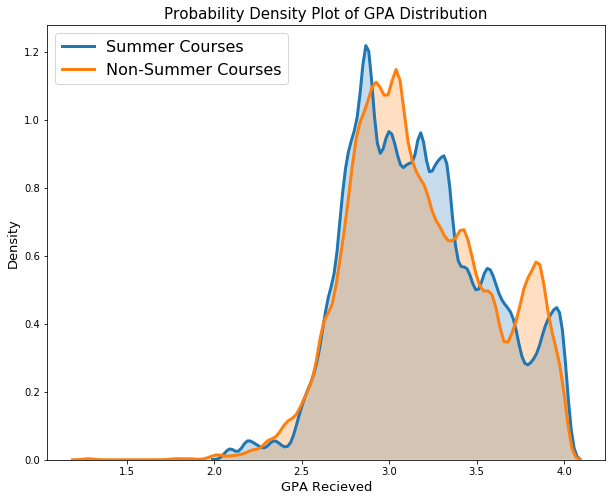

In [2]:
from analysis_modules import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure(figsize=(10, 8))
dtf = make_pandas('ucsd.txt')
terms = ['S', 'NS']
for term in terms:
    sub = dtf[dtf['Summer?'] == term]
    if term == 'S':
        temp = 'Summer Courses'
    else:
        temp = 'Non-Summer Courses'
    
    sns.distplot(sub['GPA Recieved'], hist = False, norm_hist = True,
               kde_kws = {'shade':True, 'linewidth':3, 'bw': 0.03},
               label = temp)

plt.legend(prop={'size': 16})
plt.title('Probability Density Plot of GPA Distribution',fontsize = 15)
plt.xlabel('GPA Recieved',fontsize=13)
plt.ylabel('Density',fontsize=13)


Text(0.5,1,u'Side-by-Side Histogram of GPA Distribution')

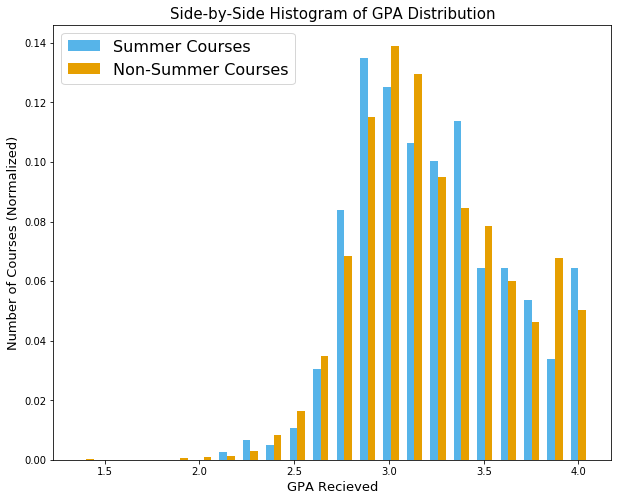

In [3]:
fig=plt.figure(figsize=(10, 8))

x1 = list(dtf[dtf['Summer?'] == 'S']['GPA Recieved'])
x2 = list(dtf[dtf['Summer?'] == 'NS']['GPA Recieved'])
weights = [np.ones_like(x1)/float(len(x1)), np.ones_like(x2)/float(len(x2))]

colors = ['#56B4E9', '#E69F00']
names = ['Summer Courses', 'Non-Summer Courses']

plt.hist([x1,x2], bins = 22, weights = weights, color = colors, label = names, align = 'right', rwidth = 0.65)

plt.legend(prop={'size': 16})
plt.xlabel('GPA Recieved',fontsize=13)
plt.ylabel('Number of Courses (Normalized)',fontsize=13)
plt.title('Side-by-Side Histogram of GPA Distribution',fontsize = 15)

In [4]:
names = dtf['Course Name'].unique()
expected = []
recieved = []
for name in names:
    expected.append(dtf[dtf['Course Name'] == name]['GPA Expected'].mean())
    recieved.append(dtf[dtf['Course Name'] == name]['GPA Recieved'].mean())
GPA_dtf = pd.DataFrame({'Course Name': names, 'Avg. GPA Expected': expected, 'Avg. GPA Recieved': recieved})

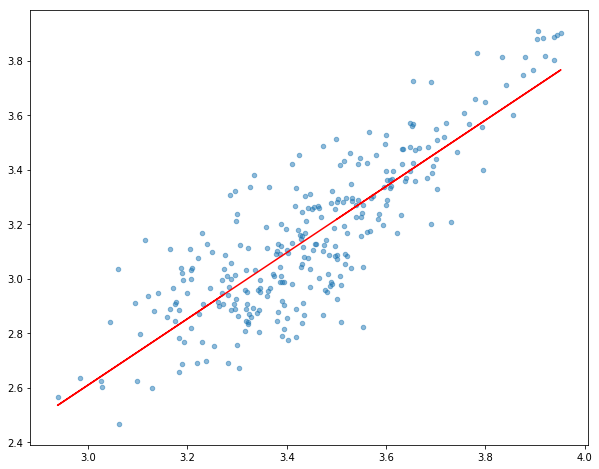

In [5]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(GPA_dtf['Avg. GPA Expected'], GPA_dtf['Avg. GPA Recieved'])

abline_values = [slope * i + intercept for i in GPA_dtf['Avg. GPA Expected']]

fig=plt.figure(figsize=(10, 8))
plt.scatter(GPA_dtf['Avg. GPA Expected'], GPA_dtf['Avg. GPA Recieved'], s=20, alpha=0.5)
plt.plot(GPA_dtf['Avg. GPA Expected'], abline_values, 'b', c='red')
plt.show()

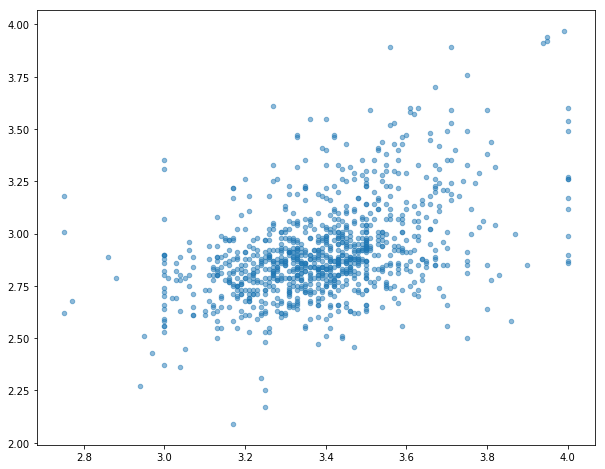

('slope:', nan, 'intercept:', nan, 'r_value:', nan, 'p_value:', nan)


In [10]:
import scipy.stats as stats
dtf = make_pandas('socialSciences.txt')
slope, intercept, r_value, p_value, std_err = stats.linregress(dtf['GPA Expected'], dtf['GPA Recieved'])

abline_values = [slope * i + intercept for i in dtf['GPA Expected']]

fig=plt.figure(figsize=(10, 8))
plt.scatter(dtf['GPA Expected'], dtf['GPA Recieved'], s=20, alpha=0.5)
plt.plot(dtf['GPA Expected'], abline_values, 'b', c='red')
plt.show()
print ("slope:", slope, "intercept:", intercept, "r_value:", r_value, "p_value:", p_value)

In [9]:
dtf.head(1177)

,Course Name,Summer?,Term,Enrolled,Evals Made,Recommend Class %,Recommend Prof %,Hrs/Week,GPA Expected,GPA Recieved
0,ECON1-PrinciplesofMicroeconomics,NS,FA11,181,86,86.9,75.0,6.10,3.16,2.77
1,ECON1-PrinciplesofMicroeconomics,NS,FA11,187,87,89.7,74.7,5.90,3.32,2.82
2,ECON1-PrinciplesofMicroeconomics,NS,FA11,441,231,93.0,96.5,5.10,3.38,2.60
3,ECON1-PrinciplesofMicroeconomics,NS,FA12,149,85,80.8,43.8,4.56,3.39,3.04
4,ECON1-PrinciplesofMicroeconomics,NS,FA12,268,142,93.0,94.6,5.31,3.50,2.98
5,ECON1-PrinciplesofMicroeconomics,NS,FA12,449,216,93.4,94.9,4.52,3.45,2.67
6,ECON1-PrinciplesofMicroeconomics,NS,FA13,392,205,82.2,61.4,4.53,3.35,2.72
7,ECON1-PrinciplesofMicroeconomics,NS,FA13,442,259,93.1,97.2,4.63,3.59,3.01
8,ECON1-PrinciplesofMicroeconomics,NS,FA14,142,72,98.4,95.1,4.33,3.66,3.02
9,ECON1-PrinciplesofMicroeconomics,NS,FA14,273,147,92.1,95.7,5.48,3.53,2.95
